In [1]:
# import the labraries for data visualization and analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score, precision_recall_curve

In [2]:
# flight delay data load
dataset= pd.read_csv("Flightdelays.csv")
dataset.head(10)

,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,FL_DATE,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,TAIL_NUM,Flight Status
0,1455,OH,1455,JFK,184,01/01/2004,5935,BWI,0,4,1,N940CA,ontime
1,1640,DH,1640,JFK,213,01/01/2004,6155,DCA,0,4,1,N405FJ,ontime
2,1245,DH,1245,LGA,229,01/01/2004,7208,IAD,0,4,1,N695BR,ontime
3,1715,DH,1709,LGA,229,01/01/2004,7215,IAD,0,4,1,N662BR,ontime
4,1039,DH,1035,LGA,229,01/01/2004,7792,IAD,0,4,1,N698BR,ontime
5,840,DH,839,JFK,228,01/01/2004,7800,IAD,0,4,1,N687BR,ontime
6,1240,DH,1243,JFK,228,01/01/2004,7806,IAD,0,4,1,N321UE,ontime
7,1645,DH,1644,JFK,228,01/01/2004,7810,IAD,0,4,1,N301UE,ontime
8,1715,DH,1710,JFK,228,01/01/2004,7812,IAD,0,4,1,N328UE,ontime
9,2120,DH,2129,JFK,228,01/01/2004,7814,IAD,0,4,1,N685BR,ontime


In [3]:
#print the shape of data and columns
print("Size of the data is:", dataset.shape)
print(dataset.columns)


Size of the data is: (2201, 13)
Index(['CRS_DEP_TIME', 'CARRIER', 'DEP_TIME', 'DEST', 'DISTANCE', 'FL_DATE',
       'FL_NUM', 'ORIGIN', 'Weather', 'DAY_WEEK', 'DAY_OF_MONTH', 'TAIL_NUM',
       'Flight Status'],
      dtype='object')


# Visualisations to explore the dataset and understand the underlying trends

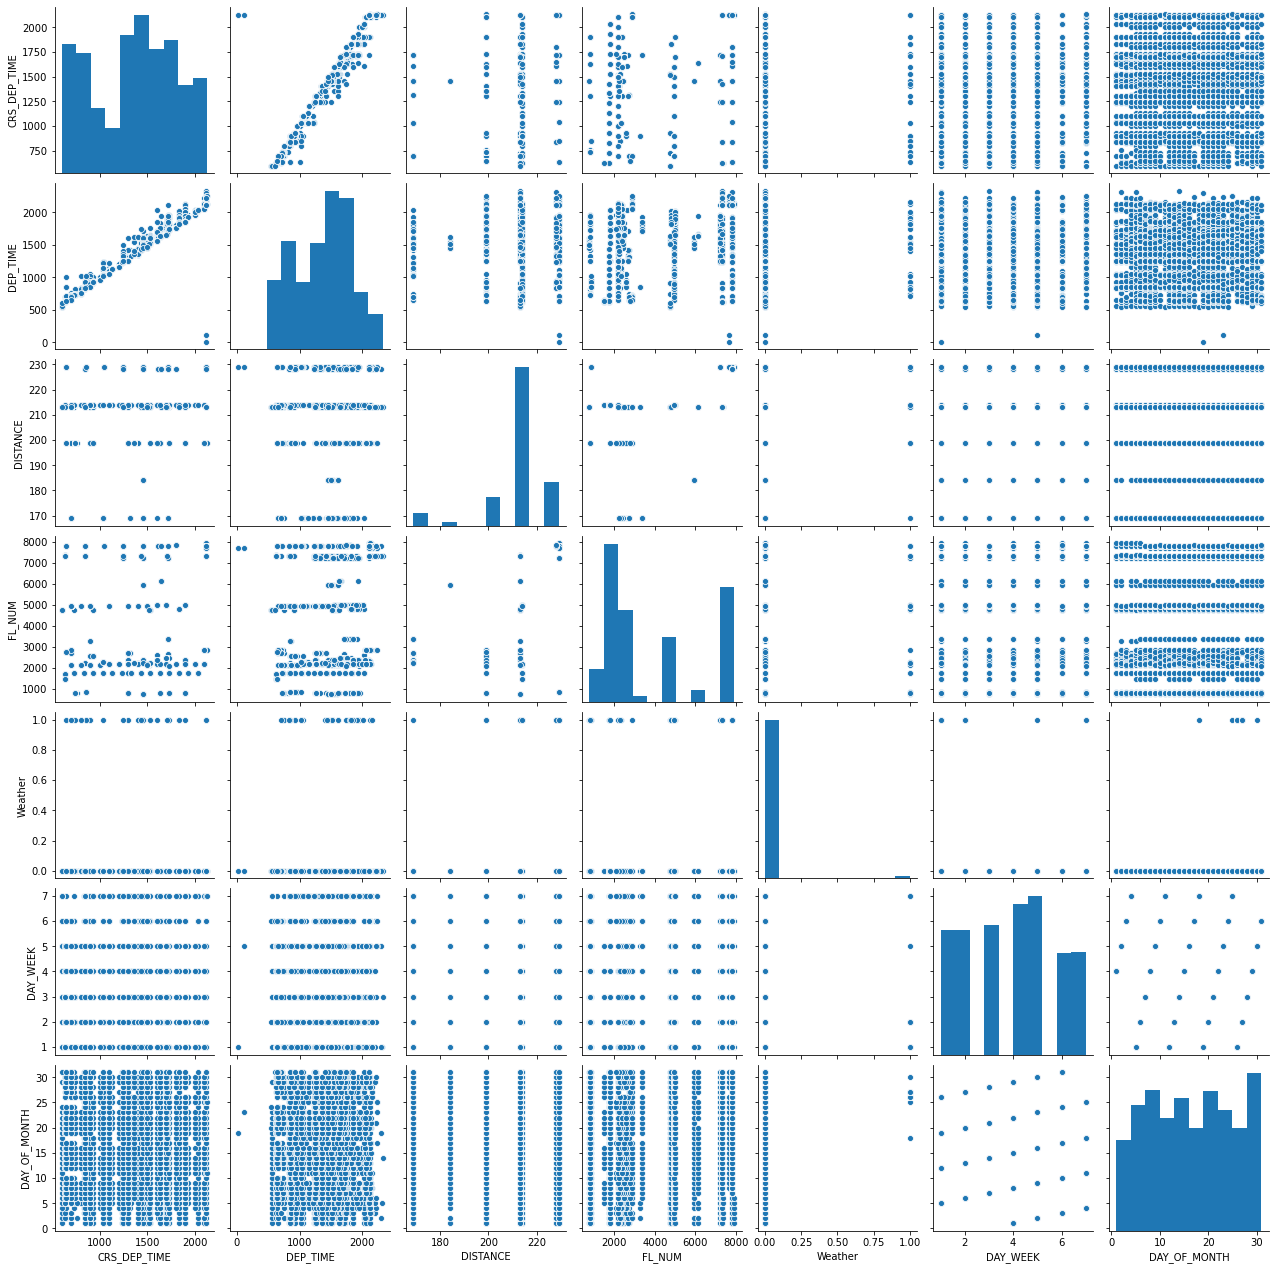

In [4]:
#plot pair plot for data visualization
sns.pairplot(data=dataset)
plt.savefig("D:\IITB 2nd sem\GNR 652 Machine Learning for remote sensing-1\pairplot.png")

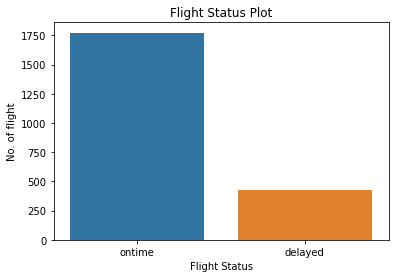

In [5]:
#investigation of data distribution in the form of flight status
sns.countplot(x = "Flight Status", data = dataset).set(title="Flight Status Plot", ylabel= "No. of flight")
plt.savefig("D:\IITB 2nd sem\GNR 652 Machine Learning for remote sensing-1\countplot.png")

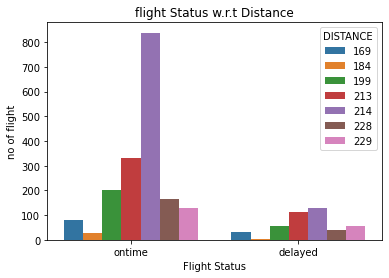

In [6]:
#Flight status visualization with travel distance(KM)
sns.countplot(x = "Flight Status", hue="DISTANCE", data = dataset).set(title = "flight Status w.r.t Distance", ylabel = "no of flight")
plt.savefig("D:\IITB 2nd sem\GNR 652 Machine Learning for remote sensing-1\distance.png")

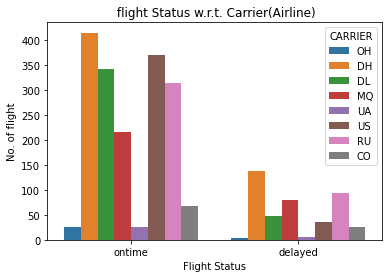

In [7]:
#flight status with carrier(airline company) 
sns.countplot(x = "Flight Status", hue="CARRIER", data = dataset).set(title = " flight Status w.r.t. Carrier(Airline)", ylabel ="No. of flight")
plt.savefig("D:\IITB 2nd sem\GNR 652 Machine Learning for remote sensing-1\carrier.png")

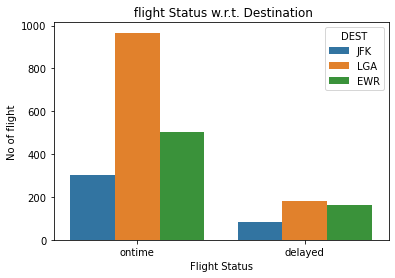

In [8]:
#flight status with Destination
sns.countplot(x = "Flight Status", hue="DEST", data = dataset).set(title = " flight Status w.r.t. Destination", ylabel="No of flight")
plt.savefig("D:\IITB 2nd sem\GNR 652 Machine Learning for remote sensing-1\destination.png")

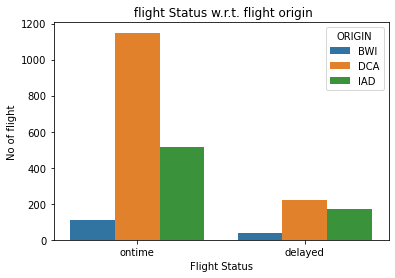

In [9]:
#flight status with origin of flight plot
sns.countplot(x = "Flight Status", hue="ORIGIN", data = dataset).set(title = " flight Status w.r.t. flight origin", ylabel="No of flight")
plt.savefig("D:\IITB 2nd sem\GNR 652 Machine Learning for remote sensing-1\origin.png")

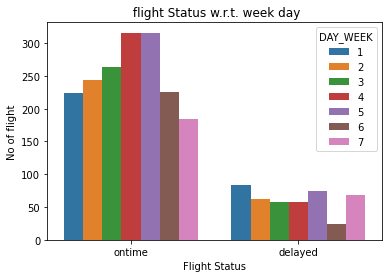

In [10]:
#flight status with week day plot
sns.countplot(x = "Flight Status", hue="DAY_WEEK", data = dataset).set(title = " flight Status w.r.t. week day", ylabel="No of flight")
plt.savefig("D:\IITB 2nd sem\GNR 652 Machine Learning for remote sensing-1\weekday.png")

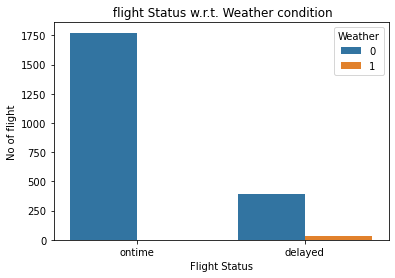

In [11]:
# flight status with weather condition plot
sns.countplot(x = "Flight Status", hue="Weather", data = dataset).set(title = " flight Status w.r.t. Weather condition", ylabel = "No of flight")
plt.savefig("D:\IITB 2nd sem\GNR 652 Machine Learning for remote sensing-1\weather condition.png")

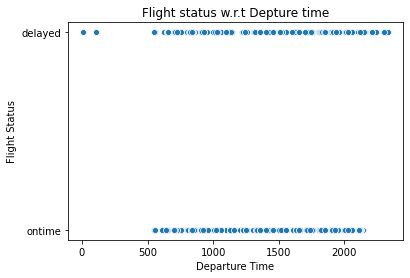

In [12]:
# flight status with flight departure time plot
sns.scatterplot(y = "Flight Status", x ="DEP_TIME", data = dataset).set(title= "Flight status w.r.t Depture time", xlabel= "Departure Time")
plt.savefig("D:\IITB 2nd sem\GNR 652 Machine Learning for remote sensing-1\ dept scatter.png")

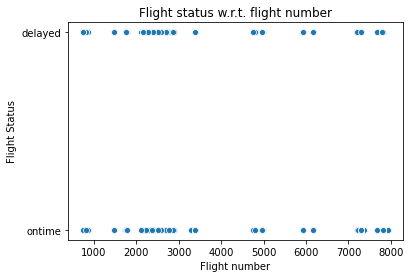

In [13]:
# flight status with flight number plot
sns.scatterplot(y = "Flight Status", x ="FL_NUM", data = dataset).set(title= "Flight status w.r.t. flight number", xlabel="Flight number")
plt.savefig("D:\IITB 2nd sem\GNR 652 Machine Learning for remote sensing-1\ flights number.png")

# Preprocess the dataset and divide the dataset into 60% train and 40% test

In [14]:
# drop the columns which are not relavent to our analysis
dtset= dataset.drop(["DAY_OF_MONTH","FL_DATE","TAIL_NUM"], axis=1, inplace=False)
dtset.head(10)

,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,FL_NUM,ORIGIN,Weather,DAY_WEEK,Flight Status
0,1455,OH,1455,JFK,184,5935,BWI,0,4,ontime
1,1640,DH,1640,JFK,213,6155,DCA,0,4,ontime
2,1245,DH,1245,LGA,229,7208,IAD,0,4,ontime
3,1715,DH,1709,LGA,229,7215,IAD,0,4,ontime
4,1039,DH,1035,LGA,229,7792,IAD,0,4,ontime
5,840,DH,839,JFK,228,7800,IAD,0,4,ontime
6,1240,DH,1243,JFK,228,7806,IAD,0,4,ontime
7,1645,DH,1644,JFK,228,7810,IAD,0,4,ontime
8,1715,DH,1710,JFK,228,7812,IAD,0,4,ontime
9,2120,DH,2129,JFK,228,7814,IAD,0,4,ontime


In [15]:
#check about the  any null values in datatset
dtset.isnull().sum()


CRS_DEP_TIME     0
CARRIER          0
DEP_TIME         0
DEST             0
DISTANCE         0
FL_NUM           0
ORIGIN           0
Weather          0
DAY_WEEK         0
Flight Status    0
dtype: int64

In [16]:
#create dummy numerical variable for categorical variable
dummydata =pd.get_dummies(dtset,columns=["CARRIER", "DEST","ORIGIN","DAY_WEEK","Flight Status"])
dummydata

,CRS_DEP_TIME,DEP_TIME,DISTANCE,FL_NUM,Weather,CARRIER_CO,CARRIER_DH,CARRIER_DL,CARRIER_MQ,CARRIER_OH,...,ORIGIN_IAD,DAY_WEEK_1,DAY_WEEK_2,DAY_WEEK_3,DAY_WEEK_4,DAY_WEEK_5,DAY_WEEK_6,DAY_WEEK_7,Flight Status_delayed,Flight Status_ontime
0,1455,1455,184,5935,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
1,1640,1640,213,6155,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,1245,1245,229,7208,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,1
3,1715,1709,229,7215,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,1
4,1039,1035,229,7792,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2196,645,644,199,2761,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2197,1700,1653,213,2497,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
2198,1600,1558,199,2361,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2199,1359,1403,199,2216,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [17]:
## for flight status (delay=0,ontime=1)
dt=dummydata.drop(["Flight Status_delayed"], axis=1,inplace=False)
dt.rename(columns= {"Flight Status_ontime":"Flight Status"})

,CRS_DEP_TIME,DEP_TIME,DISTANCE,FL_NUM,Weather,CARRIER_CO,CARRIER_DH,CARRIER_DL,CARRIER_MQ,CARRIER_OH,...,ORIGIN_DCA,ORIGIN_IAD,DAY_WEEK_1,DAY_WEEK_2,DAY_WEEK_3,DAY_WEEK_4,DAY_WEEK_5,DAY_WEEK_6,DAY_WEEK_7,Flight Status
0,1455,1455,184,5935,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
1,1640,1640,213,6155,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,1
2,1245,1245,229,7208,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
3,1715,1709,229,7215,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
4,1039,1035,229,7792,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2196,645,644,199,2761,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
2197,1700,1653,213,2497,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
2198,1600,1558,199,2361,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
2199,1359,1403,199,2216,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1


# Prepare a logistic model that can obtain accurate classifications

In [18]:
#split the dataset into 40:60 test train dataset
x1 = dt.iloc[:,:-1].values
y1 = dt.iloc[:,-1].values
x1_train, x1_test, y1_train, y1_test = train_test_split(x1,y1, shuffle= True, random_state=99, test_size=0.4)


In [19]:
# import the logistic regression model and fit into training dataset
log_reg1 = LogisticRegression()
log_reg1.fit(x1_train, y1_train)

C:\Users\KAMLESH SAHU\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
# determine the model accuracy
accuracy1= log_reg1.score(x1_test, y1_test)
print("Model accuracy is:", accuracy1)

Model accuracy is: 0.9171396140749148


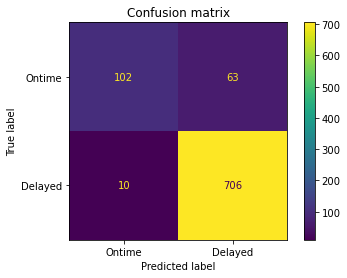

In [21]:
# determine the comfusion matrix
y1_pred = log_reg1.predict(x1_test)
cm1= confusion_matrix(y1_test,y1_pred)
cmd1 = ConfusionMatrixDisplay(cm1, display_labels=['Ontime','Delayed'])
cmd1.plot()
plt.title("Confusion matrix")
plt.savefig("D:\IITB 2nd sem\GNR 652 Machine Learning for remote sensing-1\confusion1.png")

In [22]:
# model performance in text form
from sklearn.metrics import classification_report
print(classification_report(y1_test, y1_pred))

              precision    recall  f1-score   support

           0       0.91      0.62      0.74       165
           1       0.92      0.99      0.95       716

    accuracy                           0.92       881
   macro avg       0.91      0.80      0.84       881
weighted avg       0.92      0.92      0.91       881



# Perform variable selection, and reduce the size of the model

In [23]:
#feature selection based on mutual imformation (MI)
from sklearn.feature_selection import mutual_info_regression
x_feature = dt.iloc[:,:-1]
y_label = dt.iloc[:,-1]
mutual_info = mutual_info_regression(x_feature, y_label)
mutual_info

array([0.        , 0.05183014, 0.0157415 , 0.        , 0.01266005,
       0.        , 0.        , 0.01733546, 0.        , 0.        ,
       0.02097922, 0.        , 0.01115687, 0.00661735, 0.        ,
       0.        , 0.02187319, 0.01745382, 0.        , 0.00105651,
       0.        , 0.        , 0.        , 0.00861337, 0.        ,
       0.        ])

In [24]:
# add the index column into feature dependency and and arrange into descending order 
mutual_info = pd.Series(mutual_info)
mutual_info.index = pd.Series(x_feature.columns)
impo_feature =mutual_info.sort_values(ascending= False)
print("shape of feature importance table:", impo_feature.shape)
impo_feature

shape of feature importance table: (26,)


DEP_TIME        0.051830
ORIGIN_BWI      0.021873
CARRIER_RU      0.020979
ORIGIN_DCA      0.017454
CARRIER_DL      0.017335
DISTANCE        0.015741
Weather         0.012660
CARRIER_US      0.011157
DAY_WEEK_5      0.008613
DEST_EWR        0.006617
DAY_WEEK_1      0.001057
CARRIER_OH      0.000000
FL_NUM          0.000000
CARRIER_CO      0.000000
CARRIER_DH      0.000000
CARRIER_MQ      0.000000
DAY_WEEK_7      0.000000
CARRIER_UA      0.000000
DAY_WEEK_6      0.000000
DEST_JFK        0.000000
DEST_LGA        0.000000
ORIGIN_IAD      0.000000
DAY_WEEK_2      0.000000
DAY_WEEK_3      0.000000
DAY_WEEK_4      0.000000
CRS_DEP_TIME    0.000000
dtype: float64

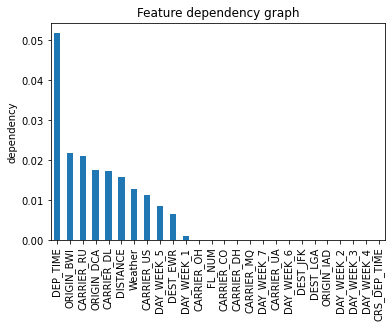

In [25]:
#plot the feature dependency via bar graph
impo_feature.plot.bar(10,0.5,).set(title = "Feature dependency graph", ylabel= "dependency")
plt.savefig("D:\IITB 2nd sem\GNR 652 Machine Learning for remote sensing-1\ dependent.png")


In [26]:
# drop the independent feature colunms
dtt= dt.rename(columns= {"Flight Status_ontime":"Flight Status"})
update_data = dtt.drop(impo_feature.index[16:], axis=1)
update_data

,DEP_TIME,DISTANCE,FL_NUM,Weather,CARRIER_CO,CARRIER_DH,CARRIER_DL,CARRIER_MQ,CARRIER_OH,CARRIER_RU,CARRIER_US,DEST_EWR,ORIGIN_BWI,ORIGIN_DCA,DAY_WEEK_1,DAY_WEEK_5,Flight Status
0,1455,184,5935,0,0,0,0,0,1,0,0,0,1,0,0,0,1
1,1640,213,6155,0,0,1,0,0,0,0,0,0,0,1,0,0,1
2,1245,229,7208,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,1709,229,7215,0,0,1,0,0,0,0,0,0,0,0,0,0,1
4,1035,229,7792,0,0,1,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2196,644,199,2761,0,0,0,0,0,0,1,0,1,0,1,0,0,1
2197,1653,213,2497,0,0,0,0,0,0,1,0,1,0,0,0,0,1
2198,1558,199,2361,0,0,0,0,0,0,1,0,1,0,1,0,0,1
2199,1403,199,2216,0,0,0,0,0,0,1,0,1,0,1,0,0,1


In [27]:
#feature taken for the training the model
print(" Important training features :\n",update_data.columns)

 Important training features :
 Index(['DEP_TIME', 'DISTANCE', 'FL_NUM', 'Weather', 'CARRIER_CO', 'CARRIER_DH',
       'CARRIER_DL', 'CARRIER_MQ', 'CARRIER_OH', 'CARRIER_RU', 'CARRIER_US',
       'DEST_EWR', 'ORIGIN_BWI', 'ORIGIN_DCA', 'DAY_WEEK_1', 'DAY_WEEK_5',
       'Flight Status'],
      dtype='object')


# fitted a new model on these selected variables

In [28]:
# split the dataset into 60:40 train and testing data
x = update_data.iloc[:,:-1].values
y = update_data.iloc[:,-1].values
x_train, x_test, y_train, y_test = train_test_split(x,y, shuffle= True, random_state=99, test_size=0.4)


In [29]:
# fit the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

In [30]:
# find the model accuracy
accuracy=log_reg.score(x_test, y_test)
print("model accuracy is:", accuracy)


model accuracy is: 0.8127128263337117


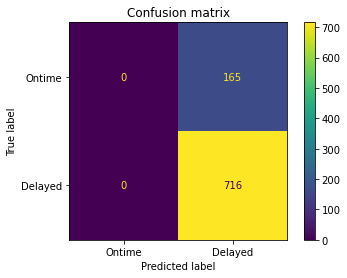

In [31]:
# derive the confusion ,metrix
#class_labels = dataset['Flight Status'].unique()
y_pred = log_reg.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Ontime','Delayed'])
cmd.plot()
plt.title("Confusion matrix")
plt.savefig("D:\IITB 2nd sem\GNR 652 Machine Learning for remote sensing-1\confusion2.png")

In [32]:
# model performance in text form
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       165
           1       0.81      1.00      0.90       716

    accuracy                           0.81       881
   macro avg       0.41      0.50      0.45       881
weighted avg       0.66      0.81      0.73       881



C:\Users\KAMLESH SAHU\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
